# EDA with dataset of student preformance

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
# it will ignore the warning coming during the run time
import warnings
warnings.filterwarnings('ignore')


In [2]:
# read the dataset
df = pd.read_csv("StudentsPerformance.csv")

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


# Data Checks to Perform
* To check the missing value
* To check the duplicate
* To check the datatype
* To check the number of unique value of each columns
* To check the staticts of data
* To check the categories present in different category column

In [5]:
#checking the missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

conclusion-- There is no any null point in our dataset

In [7]:
#checking duplicate values 
df.duplicated().sum()

np.int64(0)

There is no any duplicated value in the dataset

In [8]:
#check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
# checking the number of each unique value in each column. 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
# Checking the statistics of the dataset 
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


# Insight or Observation
* From the above observtion of numeric data- all means is very close to each other between 66 to 69
* The standard deviation is also close between 14.6 to 15.1


In [19]:
#segrregate numerical and categorical data.
Categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']
Numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']

In [22]:
Categorical_feature

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [23]:
Numerical_feature

['math score', 'reading score', 'writing score']

In [24]:
df['gender'].value_counts()

gender
female    518
male      482
Name: count, dtype: int64

In [25]:
df['lunch'].value_counts()

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

In [30]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [35]:
df['Total_Score'] = df['math score'] + df['reading score'] + df['writing score']
df['average_score'] = df['Total_Score']/3

<Axes: xlabel='average_score', ylabel='Count'>

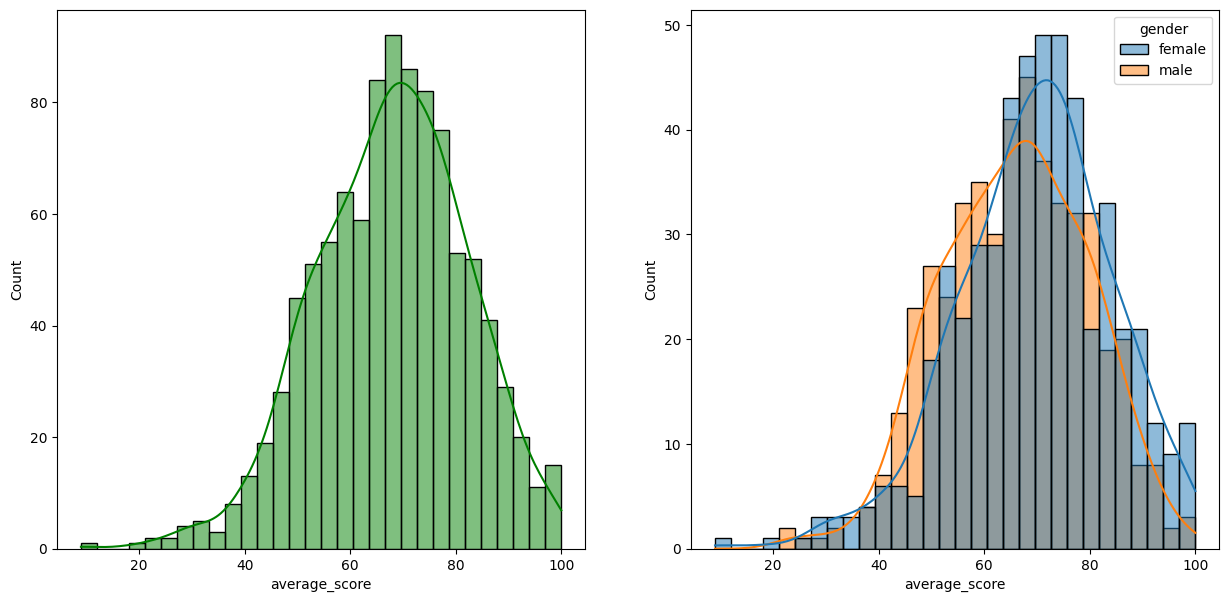

In [45]:
#Expllore more visualization 
fig,axis = plt.subplots(1,2,figsize=(15,7))
#When you specify the number of rows and columns, you determine how many subplots will be arranged vertically (rows) and horizontally (columns).
plt.subplot(121)
sns.histplot(data=df, x='average_score', bins=30,kde = True,color='g')
plt.subplot(122)
sns.histplot(data = df, x='average_score', bins = 30, kde= True, hue='gender')

# Insight
* Female students perform well than the male students

<Axes: xlabel='average_score', ylabel='Count'>

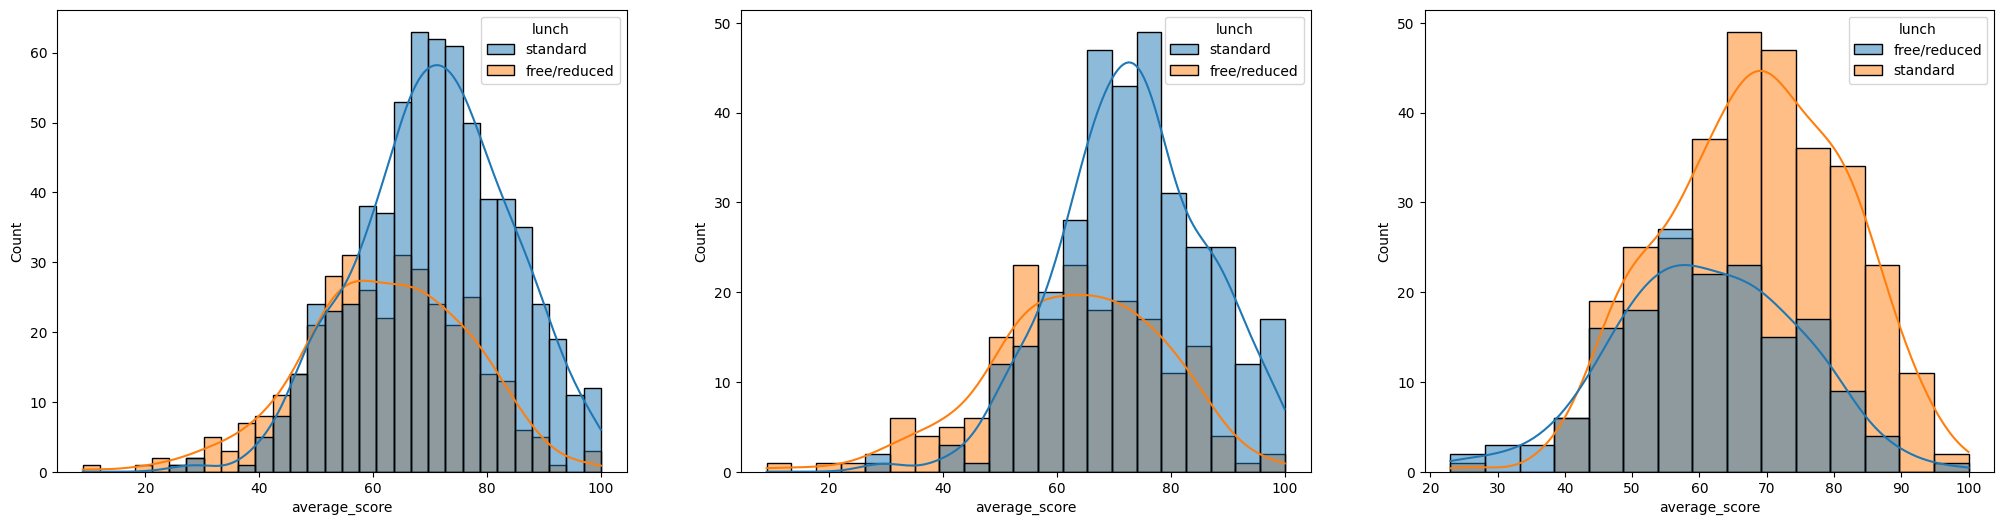

In [59]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average_score',bins=30,kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True, hue='lunch')

# Insight--
* The students having standard lunch are good in study
* The students having standard lunch are good in study either male or female

<Axes: xlabel='average_score', ylabel='Count'>

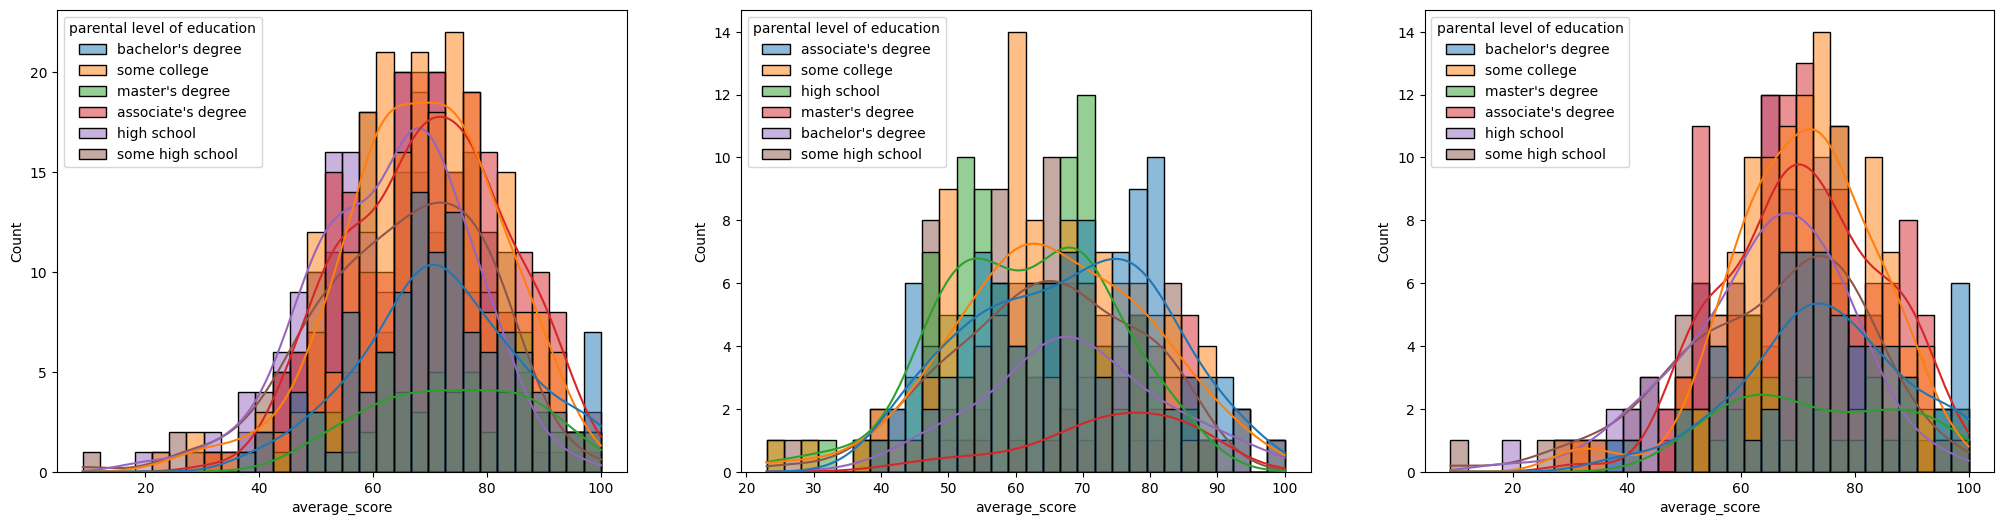

In [70]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average_score",bins=30,hue='parental level of education',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x="average_score",bins=30,hue='parental level of education',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'] ,x="average_score",bins=30,hue='parental level of education',kde=True)

# Insight--
* From 1st distribution there is no affect of parental education on child.
* From 2nd distribution male students whose parents are associate or master degree are performing well.
* 3rd female student have no affect due to parental education.

In [72]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333,76.333333


<Axes: xlabel='average_score', ylabel='Count'>

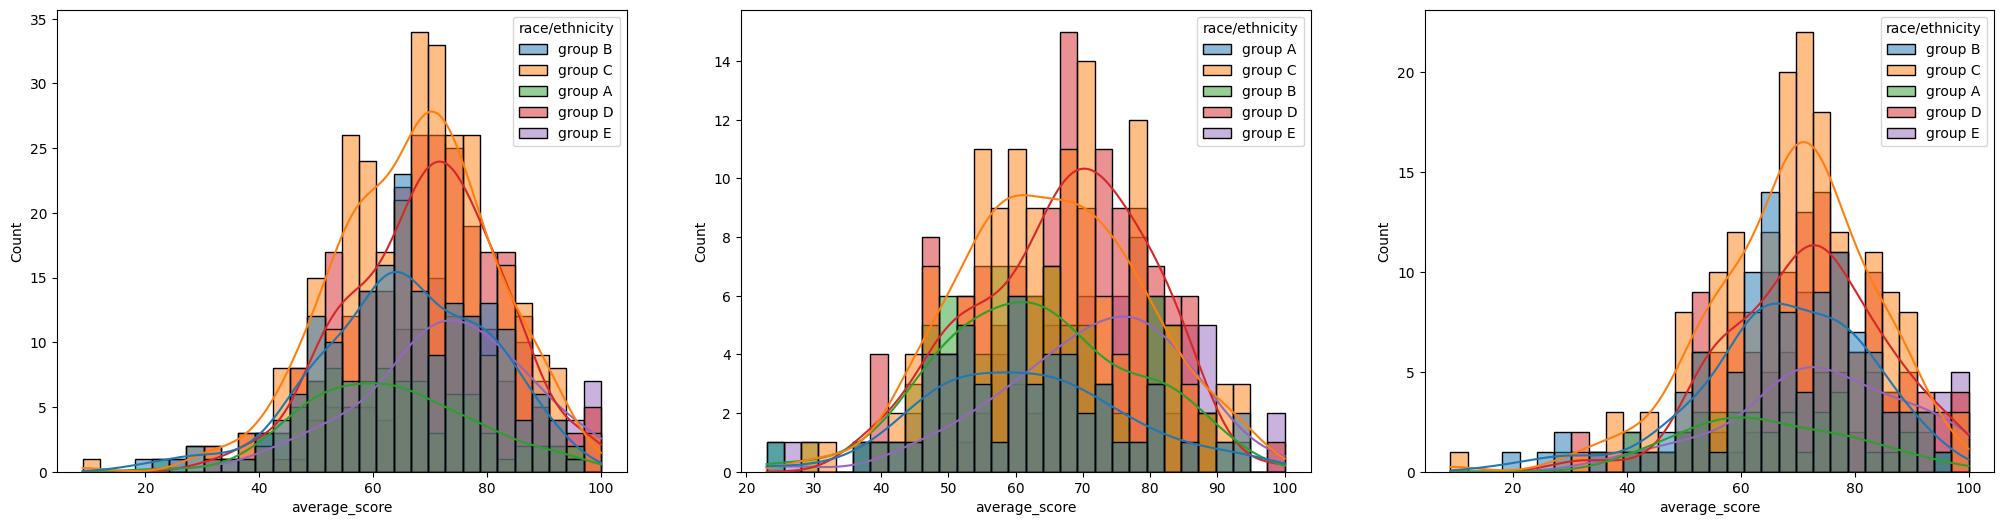

In [73]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x="average_score",bins=30,hue='race/ethnicity',kde=True)
plt.subplot(132)
sns.histplot(data=df[df.gender=='male'],x="average_score",bins=30,hue='race/ethnicity',kde=True)
plt.subplot(133)
sns.histplot(data=df[df.gender=='female'] ,x="average_score",bins=30,hue='race/ethnicity',kde=True)

# Insight-- 
* Group A students have low performance.
* Group E students have high performance.

<Axes: >

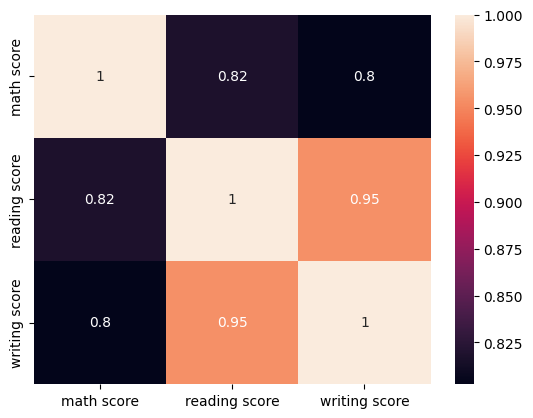

In [81]:
sns.heatmap(df[Numerical_feature].corr(),annot=True)